In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def random_forest_model(csv_file, target_column='quality', scale=False):
    # Load the CSV
    data = pd.read_csv(csv_file, sep=',')

    def categorize_quality(value):
        if value >= 7:
            return 1  # high
        else:
            return 0  # low

    y = data[target_column].apply(categorize_quality)

    # Separate features
    X = data.drop(target_column, axis=1)
    column_names = X.columns

    if scale:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest
    model = RandomForestClassifier(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.show()

    # Feature importance
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=column_names[indices])
    plt.title('Feature Importance')
    plt.show()

    return {
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": cm
    }



Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77       135
           1       0.71      0.39      0.50        31
           2       0.61      0.74      0.67       106

    accuracy                           0.70       272
   macro avg       0.70      0.62      0.65       272
weighted avg       0.71      0.70      0.70       272

Confusion Matrix:
 [[101   1  33]
 [  2  12  17]
 [ 24   4  78]]


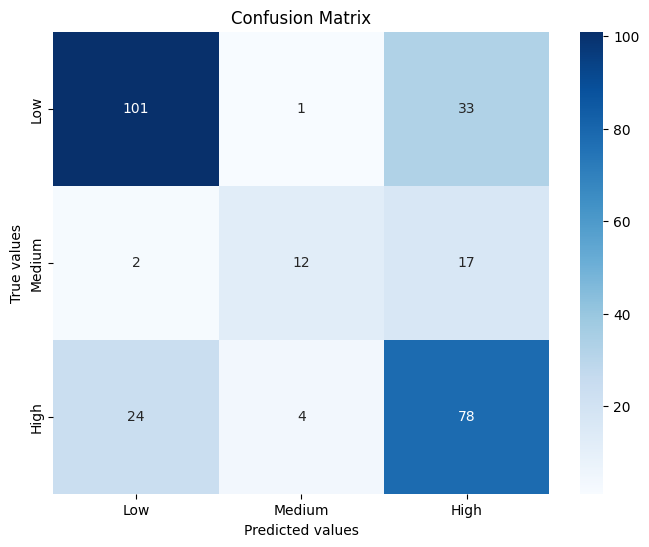

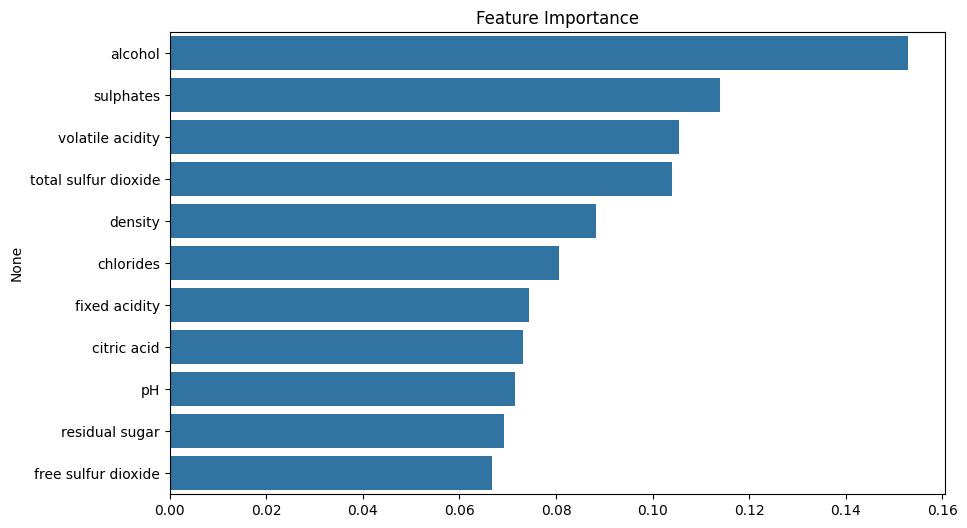

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64       269
           1       0.58      0.22      0.32       145
           2       0.57      0.70      0.63       379

    accuracy                           0.59       793
   macro avg       0.60      0.52      0.53       793
weighted avg       0.59      0.59      0.58       793

Confusion Matrix:
 [[171   2  96]
 [  4  32 109]
 [ 91  21 267]]


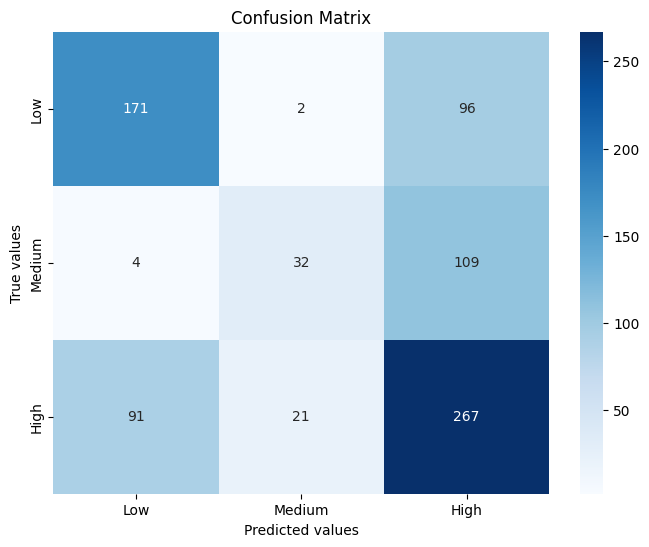

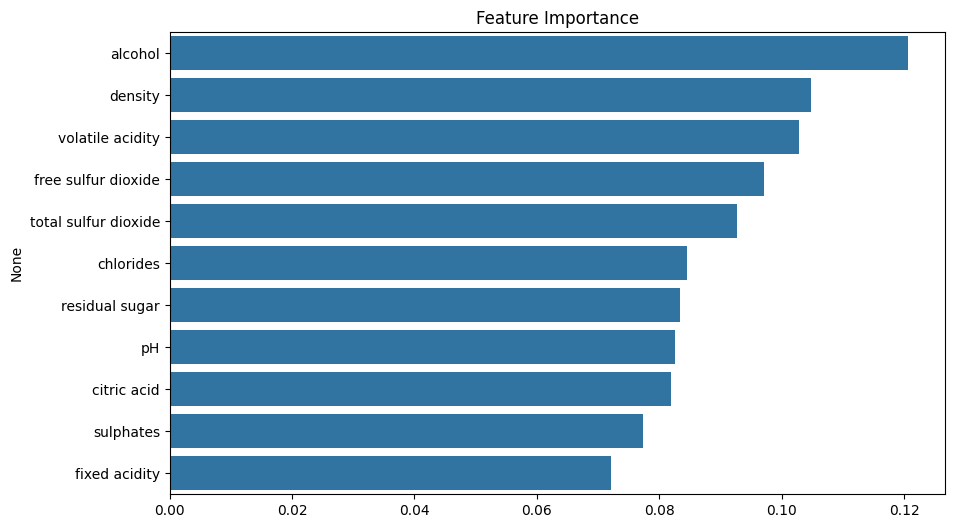

In [19]:
metrics = random_forest_model("../cleanDatasets/winequality-red_cleaned.csv", target_column="quality", scale=True)

metrics = random_forest_model("../cleanDatasets/winequality-white_cleaned.csv", target_column="quality", scale=True)